In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf71a5a8f84b6eb9b6301cd4a5dfafb4


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


639

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | salinopolis
Processing Record 2 of Set 13 | dikson
Processing Record 3 of Set 13 | goderich
Processing Record 4 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 13 | bredasdorp
Processing Record 6 of Set 13 | toora-khem
Processing Record 7 of Set 13 | bulgan
Processing Record 8 of Set 13 | carthage
Processing Record 9 of Set 13 | half moon bay
Processing Record 10 of Set 13 | arraial do cabo
Processing Record 11 of Set 13 | klaksvik
Processing Record 12 of Set 13 | norman wells
Processing Record 13 of Set 13 | udachnyy
Processing Record 14 of Set 13 | kabrai
Processing Record 15 of Set 13 | busselton
Processing Record 16 of Set 13 | ust-maya
Processing Record 17 of Set 13 | rikitea
Processing Record 18 of Set 13 | saskylakh
Processing Record 19 of Set 13 | khatanga
Processing Record 20 of Set 13 | castro
Processing Record 21 of Set 13 | san rafael
Processing Record 22

Processing Record 33 of Set 16 | lagoa
Processing Record 34 of Set 16 | obama
Processing Record 35 of Set 16 | san patricio
Processing Record 36 of Set 16 | la ronge
Processing Record 37 of Set 16 | hilo
Processing Record 38 of Set 16 | gazli
Processing Record 39 of Set 16 | mar del plata
Processing Record 40 of Set 16 | los llanos de aridane
Processing Record 41 of Set 16 | north bend
Processing Record 42 of Set 16 | yakeshi
Processing Record 43 of Set 16 | antofagasta
Processing Record 44 of Set 16 | urengoy
Processing Record 45 of Set 16 | lulea
Processing Record 46 of Set 16 | samarai
Processing Record 47 of Set 16 | kavaratti
Processing Record 48 of Set 16 | bluff
Processing Record 49 of Set 16 | lavrentiya
Processing Record 50 of Set 16 | vila do maio
Processing Record 1 of Set 17 | east london
Processing Record 2 of Set 17 | sao filipe
Processing Record 3 of Set 17 | nueve de julio
Processing Record 4 of Set 17 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set

Processing Record 19 of Set 20 | vanimo
Processing Record 20 of Set 20 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 20 | faanui
Processing Record 22 of Set 20 | sohag
Processing Record 23 of Set 20 | okha
Processing Record 24 of Set 20 | terenos
Processing Record 25 of Set 20 | pangnirtung
Processing Record 26 of Set 20 | shangqiu
Processing Record 27 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 28 of Set 20 | shkotovo-22
City not found. Skipping...
Processing Record 29 of Set 20 | rawannawi
City not found. Skipping...
Processing Record 30 of Set 20 | vardo
Processing Record 31 of Set 20 | pocao de pedras
Processing Record 32 of Set 20 | bartica
Processing Record 33 of Set 20 | san borja
Processing Record 34 of Set 20 | ambilobe
Processing Record 35 of Set 20 | tvedestrand
Processing Record 36 of Set 20 | atambua
Processing Record 37 of Set 20 | tura
Processing Record 38 of Set 20 | manokwari
Processing Record 39 of Set 20 | khalkhal
Proces

Processing Record 5 of Set 24 | walajapet
Processing Record 6 of Set 24 | victor harbor
Processing Record 7 of Set 24 | batagay-alyta
Processing Record 8 of Set 24 | yefira
City not found. Skipping...
Processing Record 9 of Set 24 | lompoc
Processing Record 10 of Set 24 | emerald
Processing Record 11 of Set 24 | ponnani
Processing Record 12 of Set 24 | vreed en hoop
City not found. Skipping...
Processing Record 13 of Set 24 | hambantota
Processing Record 14 of Set 24 | alekseyevka
Processing Record 15 of Set 24 | naze
Processing Record 16 of Set 24 | shingu
Processing Record 17 of Set 24 | zhanaozen
Processing Record 18 of Set 24 | lorengau
Processing Record 19 of Set 24 | mpongwe
Processing Record 20 of Set 24 | itaqui
Processing Record 21 of Set 24 | kirakira
Processing Record 22 of Set 24 | hay river
Processing Record 23 of Set 24 | te anau
Processing Record 24 of Set 24 | nkhotakota
Processing Record 25 of Set 24 | itaguacu
Processing Record 26 of Set 24 | teya
Processing Record 27

In [9]:
len(city_data)

592

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salinopolis,-0.6136,-47.3561,79.75,79,82,11.88,BR,2022-08-10 21:54:50
1,Dikson,73.5069,80.5464,41.94,90,99,10.83,RU,2022-08-10 21:53:12
2,Goderich,43.7501,-81.7165,75.90,64,0,4.92,CA,2022-08-10 21:51:41
3,Bredasdorp,-34.5322,20.0403,50.97,95,86,3.98,ZA,2022-08-10 21:54:51
4,Toora-Khem,52.4675,96.1100,48.74,87,2,1.05,RU,2022-08-10 21:54:51
5,Bulgan,48.8125,103.5347,51.48,88,88,4.81,MN,2022-08-10 21:54:52
6,Carthage,36.8611,10.3316,80.13,74,20,5.75,TN,2022-08-10 21:54:52
7,Half Moon Bay,37.4636,-122.4286,86.59,64,0,19.57,US,2022-08-10 21:54:53
8,Arraial Do Cabo,-22.9661,-42.0278,73.26,83,75,14.97,BR,2022-08-10 21:53:10
9,Klaksvik,62.2266,-6.5890,52.72,84,25,21.79,FO,2022-08-10 21:54:53


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Salinopolis,BR,2022-08-10 21:54:50,-0.6136,-47.3561,79.75,79,82,11.88
1,Dikson,RU,2022-08-10 21:53:12,73.5069,80.5464,41.94,90,99,10.83
2,Goderich,CA,2022-08-10 21:51:41,43.7501,-81.7165,75.90,64,0,4.92
3,Bredasdorp,ZA,2022-08-10 21:54:51,-34.5322,20.0403,50.97,95,86,3.98
4,Toora-Khem,RU,2022-08-10 21:54:51,52.4675,96.1100,48.74,87,2,1.05
5,Bulgan,MN,2022-08-10 21:54:52,48.8125,103.5347,51.48,88,88,4.81
6,Carthage,TN,2022-08-10 21:54:52,36.8611,10.3316,80.13,74,20,5.75
7,Half Moon Bay,US,2022-08-10 21:54:53,37.4636,-122.4286,86.59,64,0,19.57
8,Arraial Do Cabo,BR,2022-08-10 21:53:10,-22.9661,-42.0278,73.26,83,75,14.97
9,Klaksvik,FO,2022-08-10 21:54:53,62.2266,-6.5890,52.72,84,25,21.79


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

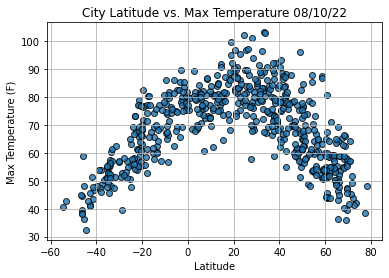

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

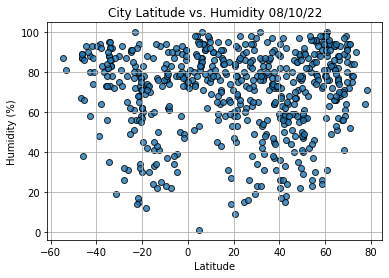

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

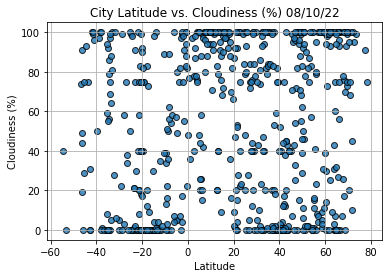

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

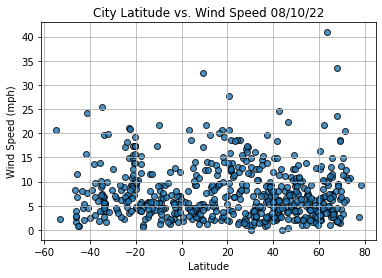

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()